In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [24]:
X, Y = make_classification(n_samples=1000,  n_classes=2, n_informative=6, random_state=0)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression
# instantiate the model and fit
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = logit.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score, log_loss, precision_score, recall_score, roc_curve

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:{}, Precision:{}, Recall:{}, AUC:{}, F1-score:{}'.format(accuracy, precision,recall,auc,f1))

Accuracy:0.82, Precision:0.822429906542056, Recall:0.8380952380952381, AUC:0.8190476190476191, F1-score:0.830188679245283


In [29]:
import itertools
def plot_confusion_matrix(cm, classes,  normalize=False,    title='Confusion matrix',  cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

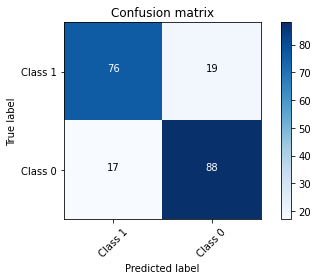

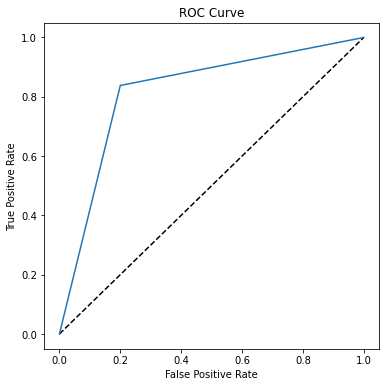

In [30]:
class_label = ['Class 1', 'Class 0']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_label, title='Confusion matrix')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()